In [1]:
%matplotlib inline
import matplotlib
import cartopy
import pandas as pd


Ground track plot:

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
ax.coastlines()

# [lng1, lng2], [lat1, lat2]
plt.plot([-0.08, 132], [51.53, 43.17], color='blue', transform=ccrs.PlateCarree())

First we make a simple great circle line plot using Cartopy: 

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
ax.coastlines()

# [lng1, lng2], [lat1, lat2]
plt.plot([-0.08, 132], [51.53, 43.17], color='#2E5FAC',  transform=ccrs.Geodetic())

Shade land:

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy

ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
ax.coastlines()

# color land and water
ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='#7f7f7f', facecolor='#B1B2B4')
ax.add_feature(cartopy.feature.OCEAN, zorder=0, facecolor='white')

# [lng1, lng2], [lat1, lat2]
plt.plot([-6.26, -82.99], [53.35, 39.96], color='#2E5FAC',  transform=ccrs.Geodetic())

Zoom in on region:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy

ax = plt.axes(projection=ccrs.Robinson())

ax.set_global()
ax.coastlines()

# [lon_min, lon_max, lat_min, lat_max]
ax.set_extent([-140, 20, 20, 65], crs=ccrs.PlateCarree())

# color land and water
ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='#7f7f7f', facecolor='#B1B2B4')
ax.add_feature(cartopy.feature.OCEAN, zorder=0, facecolor='white')

# [lon1, lon2], [lat1, lat2]
plt.plot([-6.26, -82.99], [53.35, 39.96], color='#2E5FAC', marker='o',transform=ccrs.Geodetic())

Add borders:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy

ax = plt.axes(projection=ccrs.Robinson())

ax.set_global()
ax.coastlines()

# [lon_min, lon_max, lat_min, lat_max]
ax.set_extent([-140, 20, 20, 65], crs=ccrs.PlateCarree())

# color land and water
ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='#7f7f7f', facecolor='#B1B2B4')
ax.add_feature(cartopy.feature.OCEAN, zorder=0, facecolor='white')

# country borders
ax.add_feature(cartopy.feature.BORDERS, zorder=0, edgecolor='#000000')

# state borders
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
ax.add_feature(states_provinces, edgecolor='#D3D3D3')

# [lon1, lon2], [lat1, lat2]
plt.plot([-6.26, -82.99], [53.35, 39.96], color='#2E5FAC', marker='o',transform=ccrs.Geodetic())

Create function and plot items in df:

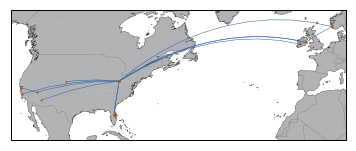

In [3]:
def plot_great_circles(df,title):
    import matplotlib.pyplot as plt
    import cartopy.crs as ccrs
    import cartopy.feature as cfeature
    import cartopy

    ax = plt.axes(projection=ccrs.Robinson())

    ax.set_global()
    ax.coastlines('50m', linewidth=0.2)

    # [lon_min, lon_max, lat_min, lat_max]
    ax.set_extent([-120, 10, 20, 65], crs=ccrs.PlateCarree())

    # color land and water
    LAND_highres = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                                edgecolor='white',
                                                facecolor='#B1B2B',
                                                linewidth=.1
                                               )
    ax.add_feature(LAND_highres, zorder=0, edgecolor='#7f7f7f', facecolor='#B1B2B4')

    # country borders
    ax.add_feature(cartopy.feature.BORDERS, zorder=0, edgecolor='#000000', linewidth=.1)

    # state borders
    states_provinces = cfeature.NaturalEarthFeature(
            category='cultural',
            name='admin_1_states_provinces_lines',
            scale='50m',
            facecolor='none', linewidth=.1)
    ax.add_feature(states_provinces, edgecolor='#D3D3D3')

    for row in range(df.shape[0]):
        # [lon1, lon2], [lat1, lat2]
        Lat_Orig = df.loc[df.index[row],'Lat_Orig']
        Lng_Orig = df.loc[df.index[row],'Lng_Orig']
        Lat_Des = df.loc[df.index[row],'Lat_Des']
        Lng_Des = df.loc[df.index[row],'Lng_Des']
        plt.plot([Lng_Orig, Lng_Des], [Lat_Orig, Lat_Des], 
                 color='#2E5FAC', marker='o', linewidth=.5,
                 markerfacecolor='#CF5300',markeredgecolor='#CF5300',markersize=1,
                 transform=ccrs.Geodetic())
    
    plt.savefig(title,bbox_inches='tight', dpi=300)
    
df = pd.read_csv('2018_travel.csv')
title='2018 Travel.png'
plot_great_circles(df,title)


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy

#https://stackoverflow.com/questions/40270990/cartopy-higher-resolution-for-great-circle-distance-line
# class LowerThresholdMercator(ccrs.Mercator):
#     @property
#     def threshold(self):
#         return 1e3
# class LowerThresholdRobinson(ccrs.Robinson):
#     @property
#     def threshold(self):
#         return 1e3

# ax = plt.axes(projection=ccrs.Robinson(central_longitude=-60, min_latitude=20,
# 	max_latitude=65, latitude_true_scale=30))
ax = plt.axes(projection=ccrs.Robinson())

ax.set_global()
ax.coastlines()

# [lon_min, lon_max, lat_min, lat_max]
ax.set_extent([-140, 20, 20, 65], crs=ccrs.PlateCarree())

# color land and water
ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='#7f7f7f', facecolor='#B1B2B4')
ax.add_feature(cartopy.feature.OCEAN, zorder=0, facecolor='white')

# [lon1, lon2], [lat1, lat2]
plt.plot([-6.26, -82.99], [53.35, 39.96], color='#2E5FAC', marker='o',transform=ccrs.Geodetic(), markerfacecolor='red')

plt.savefig('cartopy.png',bbox_inches='tight', dpi=300)

In [11]:
%load_ext watermark
%watermark -iv

matplotlib  2.2.2
cartopy     0.16.0
pandas      0.22.0

